In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import warnings
from datetime import datetime, timedelta
import seaborn as sns
import math


In [ ]:

os.chdir('/content/drive/MyDrive/Amex/parquet')


In [ ]:
train = pd.read_parquet('train.parquet')
#test = pd.read_feather('test_data.ftr')

target = pd.read_csv("train_labels.csv")


bin_cols = ['B_31', 'D_87']
cat_cols = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']
num_cols = list(set(train.columns)-set(cat_cols+['S_2', 'customer_ID']))


train['S_2'] = pd.to_datetime(train['S_2'])
train['S_2_max'] = train[['S_2','customer_ID']].groupby('customer_ID').S_2.transform('max')
train['S_2_min'] = train[['S_2','customer_ID']].groupby('customer_ID').S_2.transform('min')
#train['S_2_diff'] = train[['S_2','customer_ID']].groupby('customer_ID').S_2.transform('diff').dt.days
train['S_2_d'] = (train['S_2_max']-train['S_2']).dt.days
#train['S_2_m'] = round((train['S_2']-train['S_2_min'])/np.timedelta64(1, 'M'), 0)
train['S_2_m'] = (train['S_2']-train['S_2_min'])
train['S_2_m'] = train[['S_2_m','customer_ID']].groupby('customer_ID').rank()

train = pd.merge(train, target, on='customer_ID', how ='left')
train.sort_values(['customer_ID', 'S_2_d'],  ascending = [True, False], inplace = True)


In [ ]:
df_presence = train.groupby(['customer_ID']).size().reset_index().rename(columns={0:'presence'})
df_presence

13

In [ ]:
train = pd.merge(train, df_presence, on='customer_ID', how ='left')

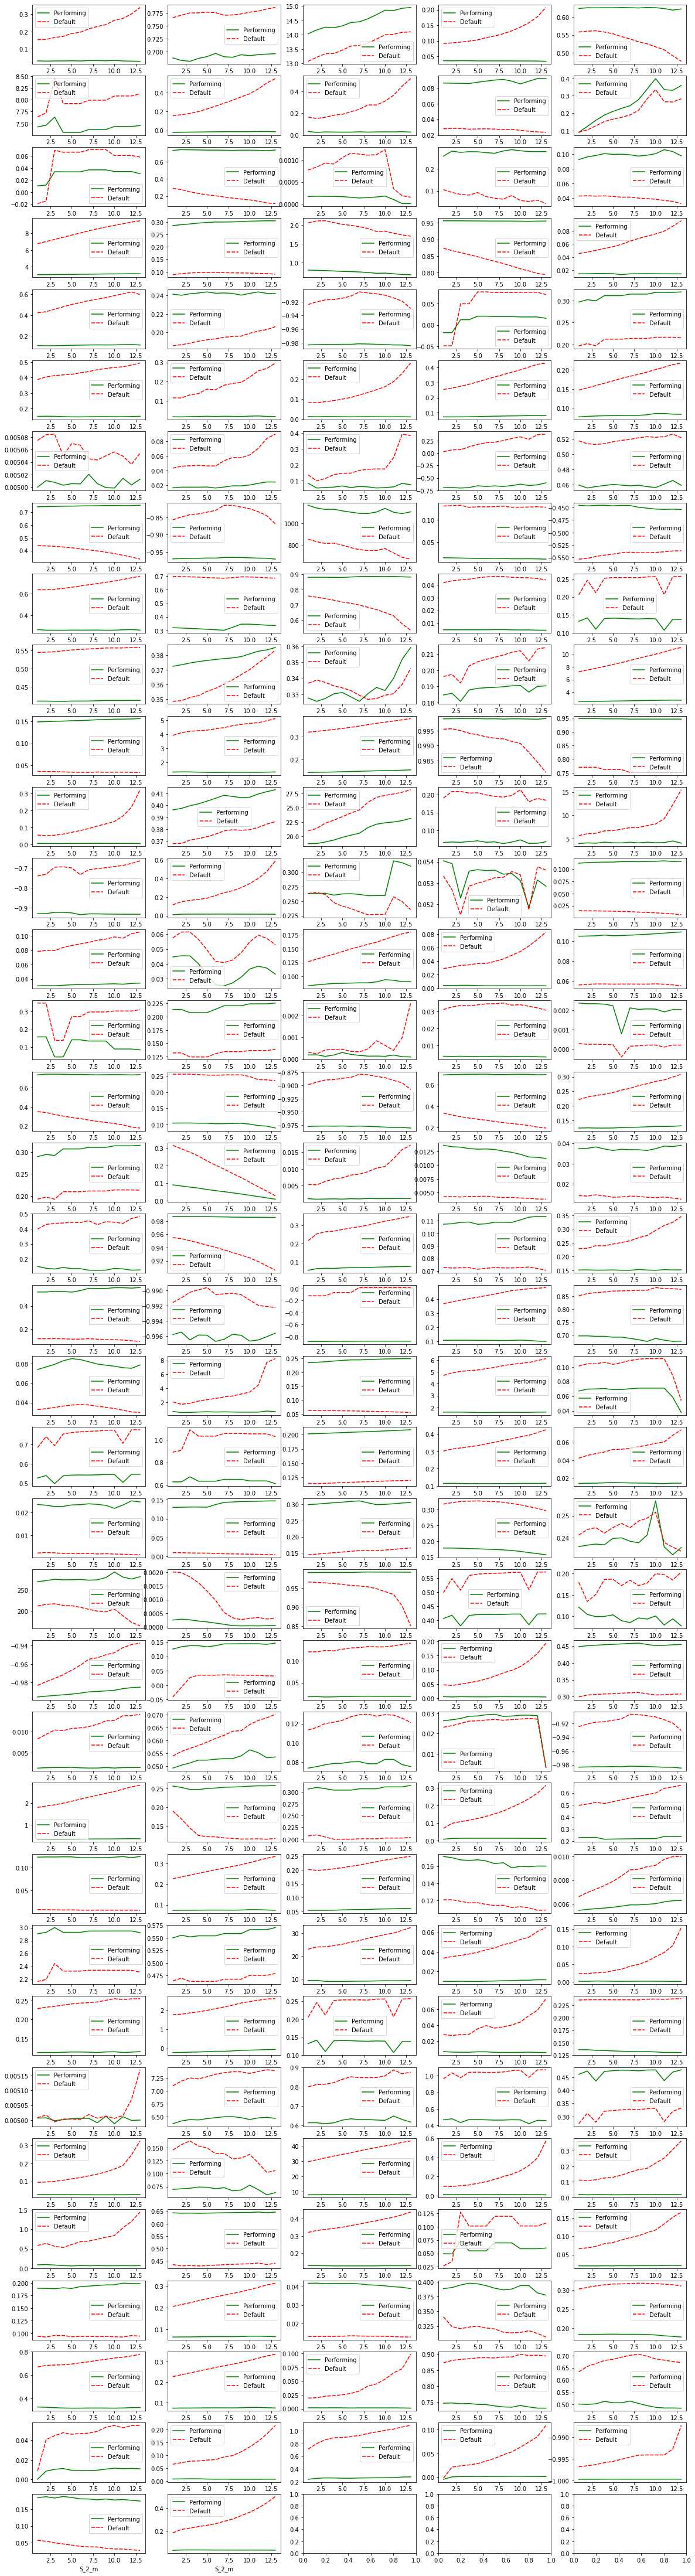

In [ ]:


i,j=0,0
PLOTS_PER_ROW = 5
fig, axs = plt.subplots(math.ceil(len(num_cols)/PLOTS_PER_ROW),PLOTS_PER_ROW, figsize=(20, 80))
for col in num_cols:
  temp1 = train[(train['target']==0) & (train['presence']==13)].groupby('S_2_m')[col].mean().reset_index().set_index('S_2_m')
  temp2 = train[(train['target']==1) & (train['presence']==13)].groupby('S_2_m')[col].mean().reset_index().set_index('S_2_m')
  temp1.columns= ['Performing']
  temp2.columns= ['Default']
  sns.lineplot(data = pd.merge(temp1, temp2, on = 'S_2_m'), palette = ['green', 'red'], ax=axs[i][j])
  j+=1
  if j%PLOTS_PER_ROW==0:
    i+=1
    j=0
plt.show()





